# Analysis of the beam characteristics at the LEBT outlet

In [8]:
def average(v):   
    ave = 0
    for i in range(len(v)):
        ave += v[i]
    return (ave/len(v))

def var(v):
    t = []
    av = average(v)
    for i in range(len(v)):
        t.append((v[i]-av)**2)
    return average(t)

def emittance(y,yprime,vx):
    t=[]
    c = 300000
    avy=average(y)
    avyprime=average(yprime)
    for i in range(len(y)):
        t.append((y[i]-avy)*(yprime[i]-avyprime))
    beta = average(vx)/c
    gamma = 1/(1+beta**2)**0.5
    emittance = ((var(y)*var(yprime)-average(t)**2)**0.5)*1000
    n_emittance = beta*gamma*emittance
    return emittance, n_emittance
    

# Experimental field Ansys (notapes oposite currents)

In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
m = 1.67E-27
e = 1.6E-19
x = []
y = []
z = []
vx = []
vy = []
vz = []
with open('rec_pep2_exp_40k_30kV_4-8_-8.csv', mode='r') as csv_file1:
    csv_reader1 = csv.reader (csv_file1, delimiter = ',')
    a=0
    for row in csv_reader1:
        if a!=0:
            x.append(float(row[1].strip()))
            y.append(float(row[2].strip()))
            z.append(float(row[3].strip()))
            vx.append(float(row[4].strip()))
            vy.append(float(row[5].strip()))
            vz.append(float(row[6].strip()))
        a=1

yprime = []
zprime = []
for i in range(len(x)):
    yprime.append(math.atan(vy[i]/vx[i]))
    zprime.append(math.atan(vz[i]/vx[i]))
   
print('yemit',emittance(y,yprime,vx))
print('xemit',emittance(z,zprime,vx))

yemit (3.0739444571089036, 0.02437367592900075)
xemit (2.692318636040647, 0.021347718817984876)


<Figure size 1600x800 with 0 Axes>

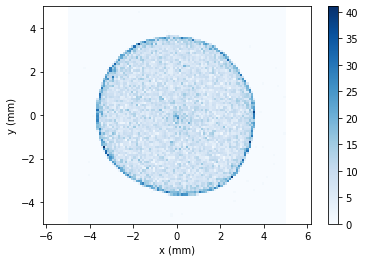

<Figure size 1600x800 with 0 Axes>

In [10]:
from scipy import stats
import numpy as np
ax = plt.axes(autoscale_on=True)
nbins = 100
plt.hist2d(y,z,nbins,range = [[-5,5],[-5,5]],cmap = 'Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('hist_radius_lebt_outlet_exp.svg')
plt.figure(figsize=(20, 10), dpi=80)

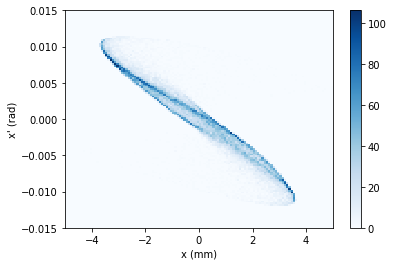

In [11]:
nbins=120
plt.hist2d(y,yprime,nbins,range = [[-5,5],[-0.015,0.015]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('hist_tracespace_outlet_x_exp.svg')

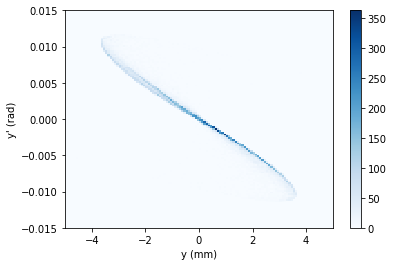

In [12]:
nbins=120
plt.hist2d(z,zprime,nbins,range = [[-5,5],[-0.015,0.015]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('hist_tracespace_outlet_y_exp.svg')

# Experimental field higher intensity

In [13]:
x2 = []
y2 = []
z2 = []
vx2 = []
vy2 = []
vz2 = []
with open('rec_pep2_exp_40k_30kV_4-8_-9.csv', mode='r') as csv_file2:
    csv_reader2 = csv.reader (csv_file2, delimiter = ',')
    a=0
    for row in csv_reader2:
        if a!=0:
            x2.append(float(row[1].strip()))
            y2.append(float(row[2].strip()))
            z2.append(float(row[3].strip()))
            vx2.append(float(row[4].strip()))
            vy2.append(float(row[5].strip()))
            vz2.append(float(row[6].strip()))
        a=1

yprime2 = []
zprime2 = []
for i in range(len(x2)):
    yprime2.append(math.atan(vy2[i]/vx2[i]))
    zprime2.append(math.atan(vz2[i]/vx2[i]))
   
print('yemit',emittance(y2,yprime2,vx2))
print('xemit',emittance(z2,zprime2,vx2))

yemit (3.285496867508192, 0.026050538232621635)
xemit (2.7395190278451054, 0.021721507598940187)


<Figure size 640x480 with 0 Axes>

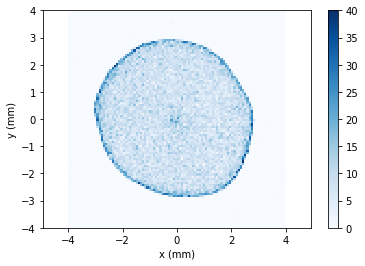

<Figure size 640x480 with 0 Axes>

In [14]:
ax = plt.axes(autoscale_on=True)
nbins = 100
plt.hist2d(y2,z2,nbins,range = [[-4,4],[-4,4]],cmap = 'Blues')
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto',cmap='Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('hist_radius_lebt_outlet_exphighI.svg')
plt.figure(figsize=(8, 6), dpi=80)


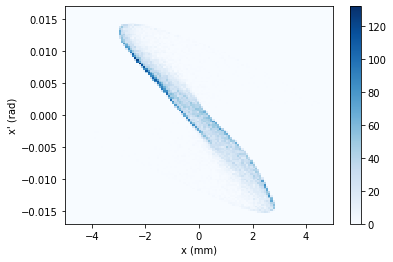

In [15]:
nbins=120
plt.hist2d(y2,yprime2,nbins,range = [[-5,5],[-0.017,0.017]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('hist_tracespace_outlet_x_exphighI.svg')

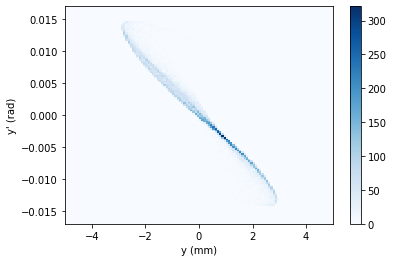

In [16]:
nbins=120
plt.hist2d(z2,zprime2,nbins,range = [[-5,5],[-0.017,0.017]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('hist_tracespace_outlet_y_exphighI.svg')

# ANSYS calculated field

In [17]:
x3 = []
y3 = []
z3 = []
vx3 = []
vy3 = []
vz3 = []
with open('rec_pep2_simans_40k_30kV_4-8_-8.csv', mode='r') as csv_file3:
    csv_reader3 = csv.reader (csv_file3, delimiter = ',')
    a=0
    for row in csv_reader3:
        if a!=0:
            x3.append(float(row[1].strip()))
            y3.append(float(row[2].strip()))
            z3.append(float(row[3].strip()))
            vx3.append(float(row[4].strip()))
            vy3.append(float(row[5].strip()))
            vz3.append(float(row[6].strip()))
        a=1

yprime3 = []
zprime3 = []
for i in range(len(x3)):
    yprime3.append(math.atan(vy3[i]/vx3[i]))
    zprime3.append(math.atan(vz3[i]/vx3[i]))
   
print('yemit',emittance(y3,yprime3,vx3))
print('xemit',emittance(z3,zprime3,vx3))

yemit (2.855596581790331, 0.02264095841551584)
xemit (2.6873611002866555, 0.021307082137252853)


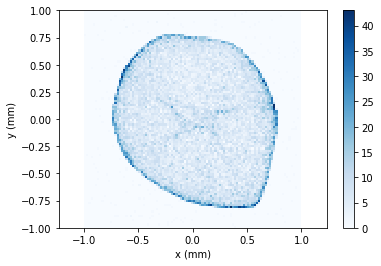

In [18]:
ax = plt.axes(autoscale_on=True)
nbins = 100
plt.hist2d(y3,z3,nbins,range = [[-1,1],[-1,1]],cmap = 'Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('hist_radius_lebt_outlet_ansys.svg')

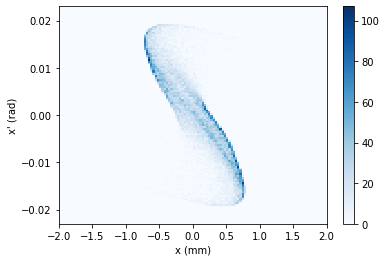

In [19]:
nbins=120
plt.hist2d(y3,yprime3,nbins,range = [[-2,2],[-0.023,0.023]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('hist_tracespace_outlet_x_ansys.svg')

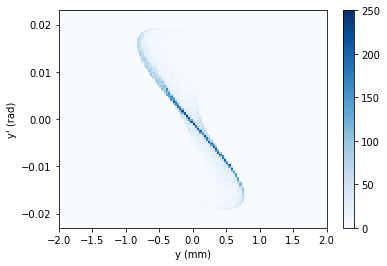

In [20]:
nbins=120
plt.hist2d(z3,zprime3,nbins,range = [[-2,2],[-0.023,0.023]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('hist_tracespace_outlet_y_ansys.svg')

# notapes SIMION field (parallel current)

In [21]:
x4 = []
y4 = []
z4 = []
vx4 = []
vy4 = []
vz4 = []
with open('rec_pep2_notapes_30kV_4-8_-8A.csv', mode='r') as csv_file4:
    csv_reader4 = csv.reader (csv_file4, delimiter = ',')
    a=0
    for row in csv_reader4:
        if a!=0:
            x4.append(float(row[1].strip()))
            y4.append(float(row[2].strip()))
            z4.append(float(row[3].strip()))
            vx4.append(float(row[4].strip()))
            vy4.append(float(row[5].strip()))
            vz4.append(float(row[6].strip()))
        a=1

yprime4 = []
zprime4 = []
for i in range(len(x4)):
    yprime4.append(math.atan(vy4[i]/vx4[i]))
    zprime4.append(math.atan(vz4[i]/vx4[i]))
   
print('yemit',emittance(y4,yprime4,vx4))
print('xemit',emittance(z4,zprime4,vx4))

yemit (3.285496867508192, 0.026050538232621635)
xemit (2.7395190278451054, 0.021721507598940187)


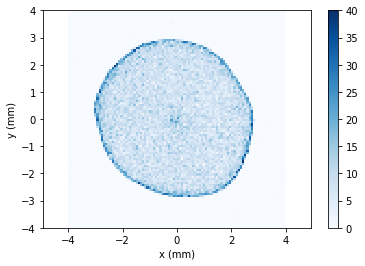

In [22]:
ax = plt.axes(autoscale_on=True)
nbins = 100
plt.hist2d(y4,z4,nbins,range = [[-4,4],[-4,4]],cmap = 'Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('hist_radius_lebt_outlet_notapes.svg')

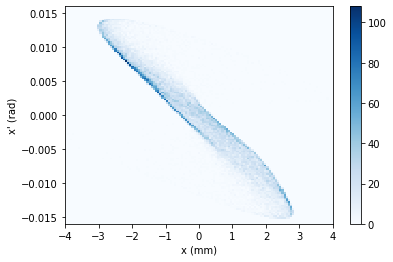

In [23]:
nbins=125
plt.hist2d(y4,yprime4,nbins,range = [[-4,4],[-0.016,0.016]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('hist_tracespace_outlet_x_notapes.svg')

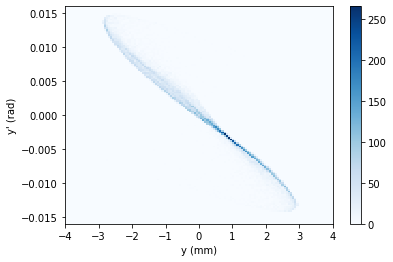

In [24]:
nbins=125
plt.hist2d(z4,zprime4,nbins,range = [[-4,4],[-0.016,0.016]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('hist_tracespace_outlet_y_notapes.svg')

# SIMION field (opposite currents)

In [25]:
x5 = []
y5 = []
z5 = []
vx5 = []
vy5 = []
vz5 = []
with open('rec_pep2_simion.csv', mode='r') as csv_file5:
    csv_reader5 = csv.reader (csv_file5, delimiter = ',')
    a=0
    for row in csv_reader5:
        if a!=0:
            x5.append(float(row[1].strip()))
            y5.append(float(row[2].strip()))
            z5.append(float(row[3].strip()))
            vx5.append(float(row[4].strip()))
            vy5.append(float(row[5].strip()))
            vz5.append(float(row[6].strip()))
        a=1

yprime5 = []
zprime5 = []
for i in range(len(x5)):
    yprime5.append(math.atan(vy5[i]/vx5[i]))
    zprime5.append(math.atan(vz5[i]/vx5[i]))
   
print('yemit',emittance(y5,yprime5,vx5))
print('xemit',emittance(z5,zprime5,vx5))

yemit (2.6133769110515033, 0.020787758912674505)
xemit (2.5605715698840408, 0.020367725852441693)


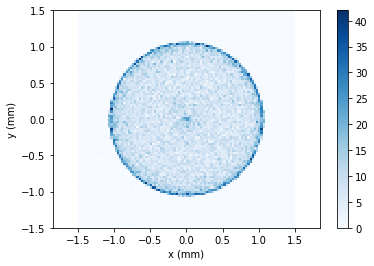

In [26]:
ax = plt.axes(autoscale_on=True)
nbins = 100
plt.hist2d(y5,z5,nbins,range = [[-1.5,1.5],[-1.5,1.5]],cmap = 'Blues')
plt.colorbar()
plt.xlim([-5,5])
plt.xlabel('x (mm)')
plt.ylabel("y (mm)")
plt.axis('equal')
plt.savefig('hist_radius_lebt_outlet_simion.svg')

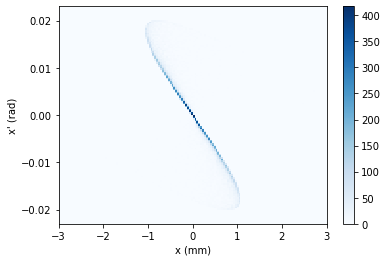

In [27]:
nbins=140
plt.hist2d(y5,yprime5,nbins,range = [[-3,3],[-0.023,0.023]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel("x' (rad)")
plt.savefig('hist_tracespace_outlet_x_simion.svg')

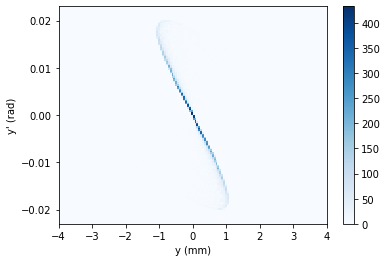

In [28]:
nbins=140
plt.hist2d(z5,zprime5,nbins,range = [[-4,4],[-0.023,0.023]],cmap = 'Blues')
plt.colorbar()
plt.xlabel('y (mm)')
plt.ylabel("y' (rad)")
plt.savefig('hist_tracespace_outlet_y_simion.svg')